In [1]:
%matplotlib notebook

In [2]:
#import modules/depedencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#set path file
file_to_load = "data/car_sales/true_car_listings.csv"

In [4]:
#read the cars data
true_car_listings = pd.read_csv(file_to_load)

In [5]:
#Calculate the number of unique listings
car_listing = true_car_listings.loc[:, ["City", "State", "Model", "Year", "Vin", "Price"]]
car_listing = car_listing.drop_duplicates()
num_listing = car_listing.count()[0]
pd.DataFrame({"Total listings": [num_listing]})

,Total listings
0,852091


In [6]:
#Run basic calculations
listing_count = len(true_car_listings["Vin"].unique())
average_car_price = true_car_listings["Price"].mean()
total_price = true_car_listings["Price"].sum()

#create a df
summary_table = pd.DataFrame({"Number of Listings":listing_count,
                              "Total Price": [total_price],
                             "Average Price": [average_car_price]})

summary_table

,Number of Listings,Total Price,Average Price
0,852075,18290031999,21464.10021


In [7]:
#Calculate the Number and Percentage by City
total_car_listings = true_car_listings["City"].value_counts()
percentage_car_listings = total_car_listings / num_listing
total_car_listings = pd.DataFrame({"Total Count": total_car_listings, "Percentage of Listings": percentage_car_listings})

#Minor Data Munging
total_car_listings ['Percentage of Listings'] = total_car_listings['Percentage of Listings'].map("{:,.2%}".format)

total_car_listings

,Total Count,Percentage of Listings
Houston,12703,1.49%
San Antonio,8078,0.95%
Louisville,5872,0.69%
Jacksonville,5675,0.67%
Austin,5297,0.62%
...,...,...
Los Banos,4,0.00%
Port Jervis,4,0.00%
Armona,4,0.00%
Pleasant Hill,4,0.00%


In [8]:
#export df into a csv file
df = pd.DataFrame(total_car_listings)
df.to_csv('data/car_sales/listing_per_city.csv')

In [9]:
total_car_listings.loc[["Nashville","Atlanta","Miami","New York","Minneapolis","Seattle","Chicago","Houston", "San Francisco","San Antonio"]]

,Total Count,Percentage of Listings
Nashville,1888,0.22%
Atlanta,1582,0.19%
Miami,5250,0.62%
New York,450,0.05%
Minneapolis,55,0.01%
Seattle,1525,0.18%
Chicago,3354,0.39%
Houston,12703,1.49%
San Francisco,439,0.05%
San Antonio,8078,0.95%


In [10]:
#export df into a csv file
df = pd.DataFrame(total_car_listings)
df.to_csv('data/car_sales/listing_per_our_city.csv')

In [11]:
file_path = 'data/car_sales/listing_per_our_city.csv'
listing_per_city = pd.read_csv(file_path)
listing_per_city.head()

,Unnamed: 0,Total Count,Percentage of Listings
0,Houston,12703,1.49%
1,San Antonio,8078,0.95%
2,Louisville,5872,0.69%
3,Jacksonville,5675,0.67%
4,Austin,5297,0.62%


In [12]:
#generate a bar plot
listings_per_city = {'City': ["Nashville","Atlanta","Miami","New York","Minneapolis","Seattle","Chicago","Houston", "San Francisco","San Antonio"],
                    'Number': [1888, 1582, 5250, 450, 55, 1525, 3354, 12703, 439, 8079]
                    }
df = pd.DataFrame(listings_per_city, columns = ['City', 'Number'])
print(df)

            City  Number
0      Nashville    1888
1        Atlanta    1582
2          Miami    5250
3       New York     450
4    Minneapolis      55
5        Seattle    1525
6        Chicago    3354
7        Houston   12703
8  San Francisco     439
9    San Antonio    8079


In [13]:
#export df into a csv file
df = pd.DataFrame(listings_per_city)
df.to_csv('data/car_sales/listings_per_city.csv')

In [14]:
data = pd.read_csv('data/car_sales/listings_per_city.csv')
df = pd.DataFrame(data)

In [15]:
df

,Unnamed: 0,City,Number
0,0,Nashville,1888
1,1,Atlanta,1582
2,2,Miami,5250
3,3,New York,450
4,4,Minneapolis,55
5,5,Seattle,1525
6,6,Chicago,3354
7,7,Houston,12703
8,8,San Francisco,439
9,9,San Antonio,8079


In [16]:
x = df['City'].head(10)

In [17]:
data = df['Number'].head(10)

<IPython.core.display.Javascript object>


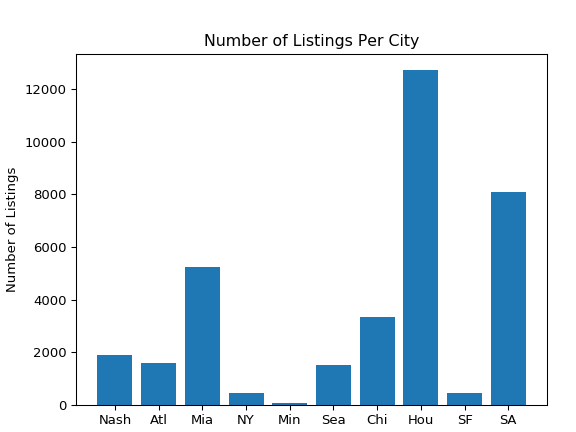

Text(0, 0.5, 'Number of Listings')

In [18]:
plt.bar(x,data); plt.xticks(x, ('Nash','Atl','Mia','NY','Min','Sea','Chi','Hou', 'SF','SA'))
plt.xticks(rotation=0)
plt.xlabel("City")
plt.title("Number of Listings Per City")
plt.ylabel("Number of Listings")

In [19]:
#calculate the number by Brand
car_brand = true_car_listings["Make"].value_counts()
car_brand = pd.DataFrame({"Total Count":car_brand})
car_brand.head(12)

,Total Count
Ford,110432
Chevrolet,102268
Toyota,77786
Nissan,66250
Honda,50193
Jeep,40373
Hyundai,35837
Dodge,34368
BMW,32415
GMC,29008


In [20]:
#export df into a csv file
df = pd.DataFrame(car_brand)
df.to_csv('data/car_sales/car_by_brand.csv')

In [21]:
#Calculate the Number and Percentage by City
average_year = true_car_listings["Year"].value_counts()
percentage_average_year = average_year / num_listing
average_year = pd.DataFrame({"Count": average_year, "Percentage of this Year": percentage_average_year})

#Minor Data Munging
average_year ['Percentage of this Year'] = average_year['Percentage of this Year'].map("{:,.2%}".format)
average_year

,Count,Percentage of this Year
2014,162432,19.06%
2015,157516,18.49%
2016,132136,15.51%
2017,91608,10.75%
2013,74701,8.77%
2012,49764,5.84%
2011,39768,4.67%
2010,27539,3.23%
2008,24713,2.90%
2007,21171,2.48%


In [22]:
#export df into a csv file
df = pd.DataFrame(average_year)
df.to_csv('data/car_sales/average_year.csv')

In [23]:
year_city = true_car_listings["Year"].value_counts()
year_city

2014    162432
2015    157516
2016    132136
2017     91608
2013     74701
2012     49764
2011     39768
2010     27539
2008     24713
2007     21171
2009     19061
2006     15079
2005     11005
2004      8117
2003      5649
2002      3800
2001      2584
2000      1933
1999      1254
2018       922
1998       774
1997       596
Name: Year, dtype: int64

In [24]:
#Run basic calculations for average year
#average_car_year = true_car_listings["Year"].mean()
#create a df
#summary_table_average_year = pd.DataFrame({"Average Year": [average_car_year]})
#summary_table_average_year

In [25]:
#count & Percentage of lisings in Nashville
nash_list = true_car_listings.loc[true_car_listings["City"] == "Nashville"]
nash_list

,Price,Year,Mileage,City,State,Vin,Make,Model
719,13995,2014,67261,Nashville,TN,19VDE1F35EE009147,Acura,ILX5-Speed
2087,9999,2009,107336,Nashville,TN,19UUA86599A017291,Acura,TL4dr
2161,17865,2013,50741,Nashville,TN,19UUA8F56DA002482,Acura,TLwith
2683,5998,2006,159032,Nashville,TN,19UUA66296A056484,Acura,TL4dr
2901,11995,2011,101032,Nashville,TN,5J8TB2H21BA000130,Acura,RDX*1-OWNER*LTHR*ROOF*BACK-UP*TECH
...,...,...,...,...,...,...,...,...
848980,26696,2016,23818,Nashville,TN,YV140MAK7G1196218,Volvo,S80T5
849086,3799,2003,190002,Nashville,TN,YV1CZ91H631004834,Volvo,XC904dr
849762,30604,2017,30069,Nashville,TN,YV440MDU4H2022909,Volvo,XC60T5
850992,5900,2009,136259,Nashville,TN,YV1MK672792149975,Volvo,C302dr


In [26]:
yearmodel_city_nash = nash_list["Year"].value_counts()
yearmodel_city_nash

2014    323
2015    290
2016    253
2017    223
2013    174
2012    125
2011     97
2010     74
2008     71
2009     64
2006     56
2007     54
2005     26
2004     20
2003     17
1997      5
2002      4
2001      4
2000      3
1998      3
1999      2
Name: Year, dtype: int64

In [27]:
#export df into a csv file
df = pd.DataFrame(yearmodel_city_nash)
df.to_csv('data/car_sales/ayearmodel_nash.csv')

In [28]:
#count & Percentage of lisings in Miami
mia_list = true_car_listings.loc[true_car_listings["City"] == "Miami"]
mia_list

,Price,Year,Mileage,City,State,Vin,Make,Model
5,7989,2012,105246,Miami,FL,JH4CU2F83CC019895,Acura,TSXAutomatic
24,14999,2014,17669,Miami,FL,19VDE1F37EE015239,Acura,ILX5-Speed
31,14999,2015,28326,Miami,FL,19VDE1F30FE000177,Acura,ILX5-Speed
69,14499,2014,33363,Miami,FL,19VDE1F52EE009561,Acura,ILX5-Speed
354,13490,2013,52573,Miami,FL,19VDE2E59DE000331,Acura,ILX6-Speed
...,...,...,...,...,...,...,...,...
851415,42493,2016,25201,Miami,FL,YV4A22PK1G1046259,Volvo,XC90AWD
851536,41987,2017,14113,Miami,FL,YV1102AK3H1007363,Volvo,S90T5
851733,48993,2017,19122,Miami,FL,YV4A22PKXH1147513,Volvo,XC90T6
851735,48993,2017,19355,Miami,FL,YV4A22PK5H1147385,Volvo,XC90T6


In [29]:
yearmodel_city_mia = mia_list["Year"].value_counts()
yearmodel_city_mia

2015    1247
2016    1098
2014    1012
2017     754
2013     341
2012     214
2011     158
2018     108
2010      91
2008      51
2009      47
2007      45
2006      21
2004      17
2003      11
2005      10
2002       9
2001       7
2000       6
1997       2
1998       1
Name: Year, dtype: int64

In [30]:
#export df into a csv file
df = pd.DataFrame(yearmodel_city_mia)
df.to_csv('data/car_sales/ayearmodel_mia.csv')

In [31]:
#count & Percentage of lisings in New York
ny_list = true_car_listings.loc[true_car_listings["City"] == "New York"]
ny_list

,Price,Year,Mileage,City,State,Vin,Make,Model
4371,26490,2015,18134,New York,NY,5J8TB4H51FL010091,Acura,RDXAWD
13724,23990,2015,99,New York,NY,WAUEFGFF4F1132915,Audi,A3Sedan
14389,25990,2016,11607,New York,NY,WAUE8GFF7G1018208,Audi,A3Sedan
24026,69995,2008,31436,New York,NY,SCBCR73W98C055460,Bentley,Continental
24155,129888,2012,18919,New York,NY,SCBGR3ZA0CC078186,Bentley,Continental
...,...,...,...,...,...,...,...,...
851764,28995,2015,38498,New York,NY,YV4902RK2F2667315,Volvo,XC602015.5
851821,31995,2015,17251,New York,NY,YV4902RK9F2665500,Volvo,XC602015.5
851918,34995,2015,34995,New York,NY,YV4902NB5F1200286,Volvo,XC70T6
852113,63995,2017,4304,New York,NY,YV4BC0PL4H1115087,Volvo,XC90T8


In [32]:
yearmodel_city_ny = ny_list["Year"].value_counts()
yearmodel_city_ny

2017    205
2015     83
2016     68
2014     43
2013     18
2010      7
2008      7
2012      6
2011      6
2006      3
2009      2
2007      1
1997      1
Name: Year, dtype: int64

In [33]:
#export df into a csv file
df = pd.DataFrame(yearmodel_city_ny)
df.to_csv('data/car_sales/ayearmodel_ny.csv')

In [34]:
#count & Percentage of lisings in Minneapolis
minn_list = true_car_listings.loc[true_car_listings["City"] == "Minneapolis"]
minn_list

,Price,Year,Mileage,City,State,Vin,Make,Model
268,15493,2013,35401,Minneapolis,MN,19VDE1F39DE004144,Acura,ILX5-Speed
482,17991,2015,29983,Minneapolis,MN,19VDE1F36FE002676,Acura,ILX5-Speed
843,5000,2008,101901,Minneapolis,MN,19UUA662X8A054486,Acura,TL4dr
1219,9991,2010,127071,Minneapolis,MN,JH4CU2F63AC011789,Acura,TSX4dr
1900,7991,2004,89979,Minneapolis,MN,19UUA65574A023881,Acura,TLManual
2595,7991,2009,166127,Minneapolis,MN,19UUA86259A001532,Acura,TL4dr
4611,25991,2015,38331,Minneapolis,MN,5J8TB4H37FL011373,Acura,RDXAWD
4616,23992,2015,36106,Minneapolis,MN,19UUB1F50FA005000,Acura,TLXFWD
4644,27191,2015,24534,Minneapolis,MN,5J8TB4H35FL005099,Acura,RDXAWD
4678,25492,2015,19691,Minneapolis,MN,19UUB1F5XFA000676,Acura,TLXFWD


In [35]:
yearmodel_city_minn = minn_list["Year"].value_counts()
yearmodel_city_minn

2015    14
2016     7
2017     5
2012     5
2013     4
2011     4
2007     4
2010     3
2008     3
2014     2
2004     2
2009     1
2001     1
Name: Year, dtype: int64

In [36]:
#export df into a csv file
df = pd.DataFrame(yearmodel_city_minn)
df.to_csv('data/car_sales/ayearmodel_minn.csv')

In [37]:
#count & Percentage of lisings in Seattle
sea_list = true_car_listings.loc[true_car_listings["City"] == "Seattle"]
sea_list

,Price,Year,Mileage,City,State,Vin,Make,Model
3403,16971,2011,76893,Seattle,WA,5J8TB1H56BA004744,Acura,RDXAWD
4298,23307,2015,34871,Seattle,WA,19UUB1F35FA012975,Acura,TLXFWD
4857,19995,2013,105949,Seattle,WA,5J8TB4H51DL008192,Acura,RDXAWD
5282,27994,2015,8623,Seattle,WA,19UUB2F74FA015603,Acura,TLXFWD
5700,19300,2011,61892,Seattle,WA,JH4KB2F64BC000397,Acura,RL4dr
...,...,...,...,...,...,...,...,...
850066,26499,2013,35000,Seattle,WA,YV4902DZ5D2416824,Volvo,XC60T6
850208,29995,2015,38709,Seattle,WA,YV440MDM7F2649536,Volvo,XC602015.5
850505,19975,2015,16942,Seattle,WA,YV126MFB5F1299795,Volvo,S60T5
850692,5488,2004,164711,Seattle,WA,YV1SZ59HX41137865,Volvo,V70XC70


In [38]:
yearmodel_city_sea = sea_list["Year"].value_counts()
yearmodel_city_sea

2015    299
2014    290
2016    182
2013    145
2017    118
2012     92
2011     76
2010     60
2008     55
2009     47
2006     43
2007     38
2005     22
2004     17
2003     14
2000      8
2002      8
2001      5
2018      3
1999      2
1998      1
Name: Year, dtype: int64

In [39]:
#export df into a csv file
df = pd.DataFrame(yearmodel_city_sea)
df.to_csv('data/car_sales/ayearmodel_sea.csv')

In [40]:
#count & Percentage of lisings in Chicago
chi_list = true_car_listings.loc[true_car_listings["City"] == "Chicago"]
chi_list

,Price,Year,Mileage,City,State,Vin,Make,Model
119,8900,2010,105055,Chicago,IL,JH4CU2F63AC004728,Acura,TSX4dr
147,21000,2017,4279,Chicago,IL,19UDE2F30HA004475,Acura,ILXAutomatic
305,14999,2013,46067,Chicago,IL,19VDE1F77DE000984,Acura,ILX5-Speed
313,22000,2017,10,Chicago,IL,19UDE2F34HA011879,Acura,ILXAutomatic
314,22000,2017,10,Chicago,IL,19UDE2F35HA011597,Acura,ILXAutomatic
...,...,...,...,...,...,...,...,...
847474,4995,2008,112437,Chicago,IL,YV1MS382082350399,Volvo,S404dr
848301,2100,2006,185834,Chicago,IL,YV4CN592661285724,Volvo,XC902.5L
848899,18000,2013,72140,Chicago,IL,YV4952DZ1D2407538,Volvo,XC603.2L
849242,19800,2016,36336,Chicago,IL,YV140MEK0G1290984,Volvo,V60T5


In [41]:
yearmodel_city_chi = chi_list["Year"].value_counts()
yearmodel_city_chi

2014    742
2015    660
2016    625
2017    318
2013    309
2012    165
2011    114
2008     84
2010     80
2007     52
2009     46
2005     46
2006     45
2004     27
2003     17
2001     10
2002      5
2000      4
2018      2
1997      1
1999      1
1998      1
Name: Year, dtype: int64

In [42]:
#export df into a csv file
df = pd.DataFrame(yearmodel_city_chi)
df.to_csv('data/car_sales/ayearmodel_chi.csv')

In [43]:
#count & Percentage of lisings in Chicago
hou_list = true_car_listings.loc[true_car_listings["City"] == "Houston"]
hou_list

,Price,Year,Mileage,City,State,Vin,Make,Model
880,18882,2015,26549,Houston,TX,19VDE1F32FE001976,Acura,ILX5-Speed
912,16950,2013,28750,Houston,TX,19VDE3F76DE300544,Acura,ILXHybrid
914,9900,2009,112246,Houston,TX,JH4CU266X9C009047,Acura,TSX4dr
982,21485,2015,8859,Houston,TX,19VDE1F51FE007754,Acura,ILX5-Speed
1000,7995,2004,80404,Houston,TX,JH4CL96854C033617,Acura,TSXAutomatic
...,...,...,...,...,...,...,...,...
851863,48243,2016,46040,Houston,TX,YV4A22PN4G1004582,Volvo,XC90AWD
851927,36988,2017,19740,Houston,TX,YV440MDU1H2120831,Volvo,XC60T5
851977,54888,2016,17018,Houston,TX,YV4A22PM1G1055688,Volvo,XC90T6
852063,65588,2017,8582,Houston,TX,YV4BC0PL4H1120127,Volvo,XC90T8


In [44]:
yearmodel_city_hou = hou_list["Year"].value_counts()
yearmodel_city_hou

2015    2347
2014    2309
2016    2080
2017    1611
2013     931
2012     672
2011     582
2010     452
2008     378
2007     322
2009     285
2006     215
2005     154
2004     110
2003      68
2002      58
2001      40
2000      32
1998      19
1999      19
1997      12
2018       7
Name: Year, dtype: int64

In [45]:
#export df into a csv file
df = pd.DataFrame(yearmodel_city_hou)
df.to_csv('data/car_sales/ayearmodel_hou.csv')

In [46]:
#count & Percentage of lisings in San Francisco
sf_list = true_car_listings.loc[true_car_listings["City"] == "San Francisco"]
sf_list

,Price,Year,Mileage,City,State,Vin,Make,Model
11517,7581,2006,95813,San Francisco,CA,WAUDH78E46A251221,Audi,A44dr
12150,22500,2014,18369,San Francisco,CA,WAUAFAFL6EA119700,Audi,A42.0T
12495,21991,2013,24002,San Francisco,CA,WAUFFAFL6DA183109,Audi,A42.0T
12868,23000,2014,45476,San Francisco,CA,WAUFFAFL0EN017470,Audi,A42.0T
13032,21000,2015,20341,San Francisco,CA,WAUACGFF8F1088005,Audi,A3Sedan
...,...,...,...,...,...,...,...,...
851137,37000,2016,15,San Francisco,CA,LYV402FM5GB098270,Volvo,S60
851138,37000,2016,22,San Francisco,CA,LYV402FM2GB090224,Volvo,S60
851161,39000,2016,7,San Francisco,CA,YV440MDM4G2785141,Volvo,XC60FWD
851162,39000,2016,7,San Francisco,CA,YV440MDM0G2872969,Volvo,XC60FWD


In [47]:
yearmodel_city_sf = sf_list["Year"].value_counts()
yearmodel_city_sf

2014    152
2015    106
2016     64
2017     51
2013     24
2012     10
2011      7
2009      6
2010      5
2008      4
2006      3
2004      3
2005      2
2018      1
2003      1
Name: Year, dtype: int64

In [48]:
#export df into a csv file
df = pd.DataFrame(yearmodel_city_sf)
df.to_csv('data/car_sales/ayearmodel_sf.csv')

In [49]:
#count & Percentage of lisings in San Antonio
sa_list = true_car_listings.loc[true_car_listings["City"] == "San Antonio"]
sa_list

,Price,Year,Mileage,City,State,Vin,Make,Model
12,7750,2009,91980,San Antonio,TX,JH4CU26639C015787,Acura,TSX4dr
51,17990,2015,24376,San Antonio,TX,19VDE1F32FE007485,Acura,ILX5-Speed
52,18500,2015,18283,San Antonio,TX,19VDE1F3XFE006097,Acura,ILX5-Speed
198,19970,2014,7496,San Antonio,TX,JH4CU2F40EC005792,Acura,TSX5-Speed
224,14999,2013,47086,San Antonio,TX,JH4CU2F64DC012339,Acura,TSX5-Speed
...,...,...,...,...,...,...,...,...
851436,43992,2016,29723,San Antonio,TX,YV4A22PK0G1073470,Volvo,XC90AWD
851573,10991,2008,96929,San Antonio,TX,YV1BW982X81035632,Volvo,V704dr
851617,47991,2016,7242,San Antonio,TX,YV4A22PK1G1038551,Volvo,XC90AWD
851784,51435,2017,10000,San Antonio,TX,YV4A22PK0H1147150,Volvo,XC90T6


In [50]:
yearmodel_city_sa = sa_list["Year"].value_counts()
yearmodel_city_sa

2016    1665
2015    1565
2014    1352
2017    1295
2013     669
2012     373
2011     317
2010     182
2008     141
2009     133
2007     123
2006      96
2005      50
2004      43
2003      27
2002      18
2018      11
2001       9
1999       4
2000       3
1997       1
1998       1
Name: Year, dtype: int64

In [51]:
#export df into a csv file
df = pd.DataFrame(yearmodel_city_sa)
df.to_csv('data/car_sales/ayearmodel_sa.csv')

In [52]:
#count & Percentage of lisings in Atlanta
atl_list = true_car_listings.loc[true_car_listings["City"] == "Atlanta"]
atl_list

,Price,Year,Mileage,City,State,Vin,Make,Model
712,20498,2016,22354,Atlanta,GA,19UDE2F89GA004128,Acura,ILXAutomatic
1485,11689,2008,55289,Atlanta,GA,19UUA66248A051406,Acura,TL4dr
1903,17898,2012,35220,Atlanta,GA,19UUA8F56CA036176,Acura,TL2WD
2246,11985,2009,91370,Atlanta,GA,19UUA86229A026937,Acura,TL4dr
2279,8631,2010,142945,Atlanta,GA,19UUA8F29AA019049,Acura,TL4dr
...,...,...,...,...,...,...,...,...
849219,21880,2012,42414,Atlanta,GA,YV4902DZ6C2266253,Volvo,XC60AWD
849571,24823,2015,50192,Atlanta,GA,YV4902RB0F2617240,Volvo,XC60T6
850756,34500,2015,24485,Atlanta,GA,YV4902NC5F1200412,Volvo,XC70T6
851465,41900,2017,5713,Atlanta,GA,YV1102AK9H1007299,Volvo,S90T5


In [53]:
yearmodel_city_atl = atl_list["Year"].value_counts()
yearmodel_city_atl

2014    288
2015    241
2016    210
2017    192
2013    170
2012     95
2011     79
2007     56
2010     51
2008     48
2009     44
2006     27
2003     22
2005     15
2004     14
2002     10
2018      5
1998      4
2001      3
2000      3
1999      3
1997      2
Name: Year, dtype: int64

In [54]:
#export df into a csv file
df = pd.DataFrame(yearmodel_city_atl)
df.to_csv('data/car_sales/ayearmodel_atl.csv')

In [55]:
#only data on nashville
city_data = true_car_listings[["City", "State", "Model", "Year", "Vin", "Price", "Mileage"]]
city_data.head()

,City,State,Model,Year,Vin,Price,Mileage
0,El Paso,TX,ILX6-Speed,2014,19VDE2E53EE000083,8995,35725
1,Long Island City,NY,ILX5-Speed,2013,19VDE1F52DE012636,10888,19606
2,El Paso,TX,ILX6-Speed,2013,19VDE2E52DE000025,8995,48851
3,Windsor,CO,ILX5-Speed,2014,19VDE1F71EE003817,10999,39922
4,Lindon,UT,ILXAutomatic,2016,19UDE2F32GA001284,14799,22142


In [56]:
our_city_df = true_car_listings.sort_values("City")
our_city_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
607283,35889,2015,29610,AKRON,OH,WDCGG8JB8FG378795,Mercedes-Benz,GLK-ClassGLK350
612735,33959,2014,35461,AKRON,OH,4JGDA5HB1EA353653,Mercedes-Benz,M-ClassML350
596174,10339,2011,102333,AKRON,OH,WDDGF8BB2BR150111,Mercedes-Benz,C-Class4dr
604632,17889,2011,72832,AKRON,OH,WDDHF8HB4BA501126,Mercedes-Benz,E-Class4dr
600013,23876,2013,39961,AKRON,OH,WDCGG8JB1DG016238,Mercedes-Benz,GLK-ClassGLK350


In [57]:
#Selecting only data on NAshville
nash_data_df = our_city_df.loc[our_city_df["City"] =="Nashville", :]
nash_data_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
61881,20110,2016,40439,Nashville,NC,1G4GB5G33GF258814,Buick,LaCrosseFWD
773113,17250,2014,39288,Nashville,TN,JTDKN3DU7E0370040,Toyota,PriusThree
18329,4499,2005,190769,Nashville,TN,WAUDG74F55N109016,Audi,A64dr
445905,18617,2015,41254,Nashville,TN,5NPE34AF2FH069811,Hyundai,SonataLimited
281613,17000,2011,71611,Nashville,TN,2FMDK4KC6BBA45306,Ford,Edge4dr


In [88]:
#Run basic calculations for Nashville
listing_count = len(nash_data_df["Vin"].unique())
average_car_price = nash_data_df["Price"].mean()
average_car_year = nash_data_df["Year"].mean()
average_car_mileage = nash_data_df["Mileage"].mean()


#create a df
summary_table_nash = pd.DataFrame({"Number of Listings":listing_count,
                              "Average Price": [average_car_price],
                             "Average Year": [average_car_year],
                              "Average Mileage": [average_car_mileage]
                             })

summary_table_nash.head()

,Number of Listings,Average Price,Average Year,Average Mileage
0,1888,19096.755297,2012.917373,63148.022775


In [89]:
summary_table_nash.insert(0, "City", "Nashville")
summary_table_nash.head()

,City,Number of Listings,Average Price,Average Year,Average Mileage
0,Nashville,1888,19096.755297,2012.917373,63148.022775


In [100]:
#export df into a csv file
df = pd.DataFrame(summary_table_nash)
df.to_csv('data/car_sales/summary_table_nash.csv')

In [59]:
#Selecting data on Miami
mia_data_df = our_city_df.loc[our_city_df["City"] =="Miami", :]
mia_data_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
319383,27377,2014,17973,Miami,FL,1FAHP2KT3EG184615,Ford,TaurusSHO
780611,22988,2015,20051,Miami,FL,2T3YFREV5FW230972,Toyota,RAV44X2
668345,23988,2016,33559,Miami,FL,5N1AZ2MG6GN109777,Nissan,MuranoFWD
338799,28997,2014,18885,Miami,FL,1FTFW1CF1EFC62693,Ford,F-1502WD
276643,20994,2015,16588,Miami,FL,1FA6P8TH1F5406926,Ford,MustangFastback


In [87]:
#Run basic calculations for Miami
listing_count = len(mia_data_df["Vin"].unique())
average_car_price = mia_data_df["Price"].mean()
average_car_year = mia_data_df["Year"].mean()
average_car_mileage = mia_data_df["Mileage"].mean()


#create a df
summary_table_mia = pd.DataFrame({"Number of Listings":listing_count,
                              "Average Price": [average_car_price],
                             "Average Year": [average_car_year],
                              "Average Mileage": [average_car_mileage]
                             })

summary_table_mia.head()

,Number of Listings,Average Price,Average Year,Average Mileage
0,5250,22489.012762,2014.53181,35476.981905


In [101]:
#export df into a csv file
df = pd.DataFrame(summary_table_mia)
df.to_csv('data/car_sales/summary_table_mia.csv')

In [90]:
summary_table_mia.insert(0, "City", "Miami")
summary_table_mia.head()

,City,Number of Listings,Average Price,Average Year,Average Mileage
0,Miami,5250,22489.012762,2014.53181,35476.981905


In [61]:
#Selecting data on New York
ny_data_df = our_city_df.loc[our_city_df["City"] =="New York", :]
ny_data_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
702283,55888,2016,19168,New York,NY,WP1AB2A53GLB45660,Porsche,MacanS
702552,50995,2015,31475,New York,NY,WP1AB2A50FLB54489,Porsche,MacanS
332203,33888,2012,45213,New York,NY,1FTFW1E68CFC05837,Ford,F-1504WD
702650,61995,2014,8292,New York,NY,WP1AB2A2XELA59264,Porsche,CayenneS
702640,52995,2015,29189,New York,NY,WP1AB2A59FLB44284,Porsche,MacanS


In [86]:
#Run basic calculations for NY
listing_count = len(ny_data_df["Vin"].unique())
average_car_price = ny_data_df["Price"].mean()
average_car_year = ny_data_df["Year"].mean()
average_car_mileage = ny_data_df["Mileage"].mean()


#create a df
summary_table_ny = pd.DataFrame({"Number of Listings":listing_count,
                              "Average Price": [average_car_price],
                             "Average Year": [average_car_year],
                              "Average Mileage": [average_car_mileage]
                             })

summary_table_ny.head()

,Number of Listings,Average Price,Average Year,Average Mileage
0,450,49833.482222,2015.462222,24404.673333


In [91]:
summary_table_ny.insert(0, "City", "New York")
summary_table_ny.head()

,City,Number of Listings,Average Price,Average Year,Average Mileage
0,New York,450,49833.482222,2015.462222,24404.673333


In [105]:
#export df into a csv file
df = pd.DataFrame(summary_table_ny)
df.to_csv('data/car_sales/summary_table_ny.csv')

In [63]:
#Selecting data on Minneapolis
minn_data_df = our_city_df.loc[our_city_df["City"] =="Minneapolis", :]
minn_data_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
555592,13993,2012,108736,Minneapolis,MN,JTHCF5C27C5053211,Lexus,IS
843,5000,2008,101901,Minneapolis,MN,19UUA662X8A054486,Acura,TL4dr
442845,10991,2011,72120,Minneapolis,MN,5NPEC4AC3BH262890,Hyundai,Sonata4dr
225894,2750,2004,170073,Minneapolis,MN,1D4HB48D04F135920,Dodge,Durango4dr
61456,8492,2008,83148,Minneapolis,MN,1G4HD57208U208858,Buick,Lucerne4dr


In [85]:
#Run basic calculations for Minneapolis
listing_count = len(minn_data_df["Vin"].unique())
average_car_price = minn_data_df["Price"].mean()
average_car_year = minn_data_df["Year"].mean()
average_car_mileage = minn_data_df["Mileage"].mean()


#create a df
summary_table_minn = pd.DataFrame({"Number of Listings":listing_count,
                              "Average Price": [average_car_price],
                             "Average Year": [average_car_year],
                              "Average Mileage": [average_car_mileage]
                             })

summary_table_minn.head()

,Number of Listings,Average Price,Average Year,Average Mileage
0,55,21066.018182,2012.563636,67945.545455


In [92]:
summary_table_minn.insert(0, "City", "Minneapolis")
summary_table_minn.head()

,City,Number of Listings,Average Price,Average Year,Average Mileage
0,Minneapolis,55,21066.018182,2012.563636,67945.545455


In [104]:
#export df into a csv file
df = pd.DataFrame(summary_table_minn)
df.to_csv('data/car_sales/summary_table_minn.csv')

In [65]:
#Selecting data on Seattle
sea_data_df = our_city_df.loc[our_city_df["City"] =="Seattle", :]
sea_data_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
571281,25880,2010,97348,Seattle,WA,JTJJM7FX8A5002585,Lexus,GX
696463,27541,2014,45783,Seattle,WA,5N1AR2MM9EC675107,Nissan,PathfinderPlatinum
53756,45995,2017,6607,Seattle,WA,WBA4F9C50HG440442,BMW,4
55989,57995,2017,7615,Seattle,WA,5UXKR0C55H0V67949,BMW,X5xDrive35i
33901,19888,2012,68890,Seattle,WA,WBAXH5C56CDW04464,BMW,5


In [84]:
#Run basic calculations for Seattle
listing_count = len(sea_data_df["Vin"].unique())
average_car_price = sea_data_df["Price"].mean()
average_car_year = sea_data_df["Year"].mean()
average_car_mileage = sea_data_df["Mileage"].mean()


#create a df
summary_table_sea = pd.DataFrame({"Number of Listings":listing_count,
                              "Average Price": [average_car_price],
                             "Average Year": [average_car_year],
                              "Average Mileage": [average_car_mileage]
                             })

summary_table_sea.head()

,Number of Listings,Average Price,Average Year,Average Mileage
0,1524,24261.921311,2012.830164,51945.451148


In [93]:
summary_table_sea.insert(0, "City", "Seattle")
summary_table_sea.head()

,City,Number of Listings,Average Price,Average Year,Average Mileage
0,Seattle,1524,24261.921311,2012.830164,51945.451148


In [106]:
#export df into a csv file
df = pd.DataFrame(summary_table_sea)
df.to_csv('data/car_sales/summary_table_sea.csv')

In [67]:
#Selecting data on Chicago
chi_data_df = our_city_df.loc[our_city_df["City"] =="Chicago", :]
chi_data_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
278051,18999,2014,37007,Chicago,IL,2FMDK3JC8EBA89825,Ford,EdgeSEL
418512,7490,2012,102385,Chicago,IL,JHMGE8H34CC027815,Honda,FitAutomatic
418531,14995,2013,62237,Chicago,IL,1HGCR2F82DA096467,Honda,Accord
467314,19400,2013,33445,Chicago,IL,JN1CV6AR0DM769498,INFINITI,G37
319309,15994,2013,112076,Chicago,IL,1FM5K8B80DGC83297,Ford,ExplorerBase


In [82]:
#Run basic calculations for Chicago
listing_count = len(chi_data_df["Vin"].unique())
average_car_price = chi_data_df["Price"].mean()
average_car_year = chi_data_df["Year"].mean()
average_car_mileage = chi_data_df["Mileage"].mean()


#create a df
summary_table_chi = pd.DataFrame({"Number of Listings":listing_count,
                              "Average Price": [average_car_price],
                             "Average Year": [average_car_year],
                              "Average Mileage": [average_car_mileage]
                             })

summary_table_chi.head()

,Number of Listings,Average Price,Average Year,Average Mileage
0,3354,19512.845259,2013.686345,44756.472868


In [94]:
summary_table_chi.insert(0, "City", "Chicago")
summary_table_chi.head()

,City,Number of Listings,Average Price,Average Year,Average Mileage
0,Chicago,3354,19512.845259,2013.686345,44756.472868


In [107]:
#export df into a csv file
df = pd.DataFrame(summary_table_chi)
df.to_csv('data/car_sales/summary_table_chi.csv')

In [69]:
#Selecting data on Houston
hou_data_df = our_city_df.loc[our_city_df["City"] =="Houston", :]
hou_data_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
563654,11950,2006,192739,Houston,TX,JTJBT20X360102858,Lexus,GX
772466,17645,2015,21539,Houston,TX,JTDKN3DU1F1963033,Toyota,PriusTwo
631524,12695,2015,53869,Houston,TX,ML32A4HJ9FH049771,Mitsubishi,MirageES
149975,24345,2015,102499,Houston,TX,3GCPCREC9FG200621,Chevrolet,Silverado
772382,7595,2010,97289,Houston,TX,JTDKN3DU2A0227555,Toyota,Prius5dr


In [81]:
#Run basic calculations for Houston
listing_count = len(hou_data_df["Vin"].unique())
average_car_price = hou_data_df["Price"].mean()
average_car_year = hou_data_df["Year"].mean()
average_car_mileage = hou_data_df["Mileage"].mean()


#create a df
summary_table_hou = pd.DataFrame({"Number of Listings":listing_count,
                              "Average Price": [average_car_price],
                             "Average Year": [average_car_year],
                              "Average Mileage": [average_car_mileage]
                             })

summary_table_hou.head()

,Number of Listings,Average Price,Average Year,Average Mileage
0,12701,23498.901283,2013.384476,52351.761789


In [95]:
summary_table_hou.insert(0, "City", "Houston")
summary_table_hou.head()

,City,Number of Listings,Average Price,Average Year,Average Mileage
0,Houston,12701,23498.901283,2013.384476,52351.761789


In [108]:
#export df into a csv file
df = pd.DataFrame(summary_table_hou)
df.to_csv('data/car_sales/summary_table_hou.csv')

In [71]:
#Selecting data on San francisco
sf_data_df = our_city_df.loc[our_city_df["City"] =="San Francisco", :]
sf_data_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
42401,31997,2015,32105,San Francisco,CA,5UXWX9C50F0D53334,BMW,X3xDrive28i
54394,44997,2015,23310,San Francisco,CA,WBA3T3C53FP738322,BMW,4
38121,28997,2014,29961,San Francisco,CA,WBA5A5C54ED507066,BMW,5
35825,29997,2014,30953,San Francisco,CA,WBA3F9C5XEF484557,BMW,3
12150,22500,2014,18369,San Francisco,CA,WAUAFAFL6EA119700,Audi,A42.0T


In [80]:
#Run basic calculations for SF
listing_count = len(sf_data_df["Vin"].unique())
average_car_price = sf_data_df["Price"].mean()
average_car_year = sf_data_df["Year"].mean()
average_car_mileage = sf_data_df["Mileage"].mean()


#create a df
summary_table_sf = pd.DataFrame({"Number of Listings":listing_count,
                              "Average Price": [average_car_price],
                             "Average Year": [average_car_year],
                              "Average Mileage": [average_car_mileage]
                             })

summary_table_sf.head()

,Number of Listings,Average Price,Average Year,Average Mileage
0,439,25395.332574,2014.384966,28734.041002


In [96]:
summary_table_sf.insert(0, "City", "San Francisco")
summary_table_sf.head()

,City,Number of Listings,Average Price,Average Year,Average Mileage
0,San Francisco,439,25395.332574,2014.384966,28734.041002


In [109]:
#export df into a csv file
df = pd.DataFrame(summary_table_sf)
df.to_csv('data/car_sales/summary_table_sf.csv')

In [73]:
#Selecting data on San Antonio
sa_data_df = our_city_df.loc[our_city_df["City"] =="San Antonio", :]
sa_data_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
290739,27888,2016,8475,San Antonio,TX,1FA6P8CF9G5300160,Ford,MustangFastback
849099,24993,2016,32532,San Antonio,TX,YV440MDK9G2843582,Volvo,XC60FWD
53680,49968,2017,10183,San Antonio,TX,5UXXW3C59H0T78396,BMW,X4xDrive28i
638846,15898,2015,16474,San Antonio,TX,1N4AL3AP4FN369597,Nissan,Altima2.5
417947,24500,2015,50662,San Antonio,TX,5FNYF3H30FB027811,Honda,PilotSE


In [79]:
#Run basic calculations for SA
listing_count = len(sa_data_df["Vin"].unique())
average_car_price = sa_data_df["Price"].mean()
average_car_year = sa_data_df["Year"].mean()
average_car_mileage = sa_data_df["Mileage"].mean()


#create a df
summary_table_sa = pd.DataFrame({"Number of Listings":listing_count,
                              "Average Price": [average_car_price],
                             "Average Year": [average_car_year],
                              "Average Mileage": [average_car_mileage]
                             })

summary_table_sa.head()

,Number of Listings,Average Price,Average Year,Average Mileage
0,8078,23300.769745,2014.116984,44020.33127


In [97]:
summary_table_sa.insert(0, "City", "San Antonio")
summary_table_sa.head()

,City,Number of Listings,Average Price,Average Year,Average Mileage
0,San Antonio,8078,23300.769745,2014.116984,44020.33127


In [110]:
#export df into a csv file
df = pd.DataFrame(summary_table_sa)
df.to_csv('data/car_sales/summary_table_sa.csv')

In [75]:
#Selecting data on Atlanta
atl_data_df = our_city_df.loc[our_city_df["City"] =="Atlanta", :]
atl_data_df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
701943,41985,2013,65768,Atlanta,GA,WP0AA2A79DL012502,Porsche,Panamerabase
341590,41988,2012,55143,Atlanta,GA,1FTFW1R69CFA67039,Ford,F-1504WD
639000,15991,2014,8929,Atlanta,GA,1N4AL3AP0EC422578,Nissan,Altima2.5
1485,11689,2008,55289,Atlanta,GA,19UUA66248A051406,Acura,TL4dr
35437,21995,2013,52242,Atlanta,GA,WBAXG5C5XDDY32083,BMW,5


In [77]:
#Run basic calculations for Atlanta
listing_count = len(atl_data_df["Vin"].unique())
average_car_price = atl_data_df["Price"].mean()
average_car_year = atl_data_df["Year"].mean()
average_car_mileage = atl_data_df["Mileage"].mean()


#create a df
summary_table_atl = pd.DataFrame({
                                "Number of Listings":listing_count,
                                "Average Price": [average_car_price],
                                "Average Year": [average_car_year],
                                "Average Mileage": [average_car_mileage]
                             })
summary_table_atl.head()

,Number of Listings,Average Price,Average Year,Average Mileage
0,1582,23417.041719,2013.038559,52538.948167


In [78]:
summary_table_atl.insert(0, "City", "Atlanta")
summary_table_atl.head()

,City,Number of Listings,Average Price,Average Year,Average Mileage
0,Atlanta,1582,23417.041719,2013.038559,52538.948167


In [111]:
#export df into a csv file
df = pd.DataFrame(summary_table_atl)
df.to_csv('data/car_sales/summary_table_atl.csv')